In [54]:
%matplotlib inline

In [2]:
prop2016 = pd.read_csv('properties_2016.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
prop2016.describe().iloc[:, 20:39].T

,count,mean,std,min,25%,50%,75%,max
garagecarcnt,883267.0,1.823517e+00,0.610035,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.500000e+01
garagetotalsqft,883267.0,3.837694e+02,245.443419,0.000000e+00,3.240000e+02,4.410000e+02,4.940000e+02,7.749000e+03
heatingorsystemtypeid,1806401.0,4.012053e+00,3.293733,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
latitude,2973780.0,3.400147e+07,243381.178311,3.332439e+07,3.382768e+07,3.400825e+07,3.416186e+07,3.481965e+07
longitude,2973780.0,-1.182019e+08,345317.101272,-1.194758e+08,-1.183930e+08,-1.181725e+08,-1.179495e+08,-1.175543e+08
lotsizesquarefeet,2709118.0,2.282281e+04,337592.366408,1.000000e+02,5.688000e+03,7.000000e+03,9.898000e+03,3.282638e+08
poolcnt,517534.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
poolsizesum,27960.0,5.197110e+02,191.323284,1.900000e+01,4.300000e+02,4.950000e+02,5.940000e+02,1.741000e+04
pooltypeid10,36939.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
pooltypeid2,32075.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


1. 위치
    - 위치값 종류
        - 위도, 경도 ('latitude' , 'longtitude')
        - FIPS ('rawcensustractandblock', 'censustractandblock') 
            - county, city보다 작은 범위의 구역.
            - Census Blocks in Ca. https://www.fcc.gov/general/census-blocks-state
            - 2010 census block map & text https://www.census.gov/geo/maps-data/maps/block/2010/county/dc10blk_st06_county.html
            - county level chart in python with FIPS https://medium.com/@plotlygraphs/what-is-a-fips-code-county-level-charts-in-python-4eff383a4cf6
        - REGIONID ('regionidcounty','regionidcity', 'regionidneighborhood')
        - 우편번호 ZIP ('regionidzip')
    - *단독정보로 쓰인다면 집의 분포? 밀집도만 나타낼 수 있지만
    - 다른 정보와 함께 (위도, 경도, 변수) 3차원으로 권역별 heatmap을 나타낼 수 있지 않을까?*  
    - 위치값과 추정치는 상관 없다는 인사이트 (https://www.kaggle.com/kueipo/simple-eda-geo-data-time-series "3.3 Where are the Perfect Estimation area?")

2. 풀
    - 풀의 총면적 
    - 풀의 갯수 (0/1) -> 풀의 평균면적 구할 필요x
    - 풀 타입 (0/1)
        - pooltypeid10 스파나 핫텁
        - pooltypeid2 스파나 핫텁있는 풀
        - pooltypeid7 그냥 풀

3. 차고
    - 차고 개수
    - 차고 총 면적
    - *garagetotalsqft / garagecarcnt = 평균차고면적*
    -

4. 난방
    - 난방 시스템 타입

5. 토지용도 (상가형태, 주택형태, 공터 etc.) 
    - 변수는 세가지인데 같은 typeID를 사용하는 듯
        - 'propertycountylandusecode'
        - 'propertylandusetypeid'
        - 'propertyzoningdesc'


# 풀

In [46]:
prop2016.poolcnt.value_counts()

1.0    517534
Name: poolcnt, dtype: int64

In [50]:
pool = ['poolcnt','poolsizesum','pooltypeid10','pooltypeid2','pooltypeid7']
for p in pool:
    print(p)
    print(prop2016[p].value_counts())

poolcnt
1.0    517534
Name: poolcnt, dtype: int64
poolsizesum
450.0     3179
400.0      972
480.0      917
500.0      828
512.0      826
600.0      806
800.0      744
420.0      546
648.0      524
576.0      499
540.0      446
525.0      419
380.0      382
544.0      379
360.0      349
448.0      336
720.0      316
510.0      302
550.0      286
560.0      271
640.0      265
405.0      248
684.0      233
350.0      230
700.0      215
300.0      207
612.0      191
460.0      185
608.0      179
578.0      179
          ... 
293.0        1
1001.0       1
1065.0       1
1004.0       1
1010.0       1
1015.0       1
1016.0       1
1025.0       1
1028.0       1
1032.0       1
1036.0       1
1037.0       1
689.0        1
1063.0       1
1064.0       1
1067.0       1
1124.0       1
1069.0       1
681.0        1
1070.0       1
1075.0       1
677.0        1
1076.0       1
1084.0       1
1088.0       1
1090.0       1
1094.0       1
1116.0       1
1121.0       1
1142.0       1
Name: poolsizesum, Leng

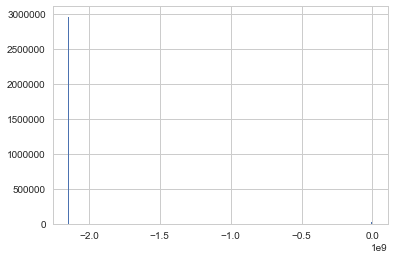

In [56]:
x = prop2016.poolsizesum.values.astype("int")
arrays, bins, patches = plt.hist(x, bins=300)
plt.show()

# 위치
z값을 바꿔가며 분포를 나타낸다..?
*https://medium.com/@plotlygraphs/what-is-a-fips-code-county-level-charts-in-python-4eff383a4cf6 *


1. 지도에  logerrer 를 등고선으로 나타낸다
x = 경도 y = 위도 z = logerrer

2. 지도에 밀집도 를 등고선으로 나타낸다
x = 경도 y = 위도 z = count

In [6]:
location_fip = ['rawcensustractandblock', 'censustractandblock']
location_regID = ['regionidcounty','regionidcity', 'regionidneighborhood']

In [42]:
prop2016[location_fip] = prop2016[location_fip].astype("str")

In [45]:
prop2016[location_fip][prop2016.censustractandblock != 'nan'][:5]

,rawcensustractandblock,censustractandblock
295,61110010.011023,61110010011023.0
296,61110009.032019,61110009032019.0
297,61110010.024015,61110010024015.0
298,61110010.023002,61110010023002.0
299,61110010.024021,61110010024021.0


In [39]:
fipmapping = pd.read_csv('fipcode.csv').iloc[18:56 , 0:2]
fipmapping

,fipcode,county
18,6037,Los Angeles County
19,6039,Madera County
20,6041,Marin County
21,6043,Mariposa County
22,6045,Mendocino County
23,6047,Merced County
24,6049,Modoc County
25,6051,Mono County
26,6053,Monterey County
27,6055,Napa County
